# Initial test to get to know the data

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go


Folder: /train, Example: 600, Image: lesionMask.nii.gz, Pixels: (182, 218, 182)


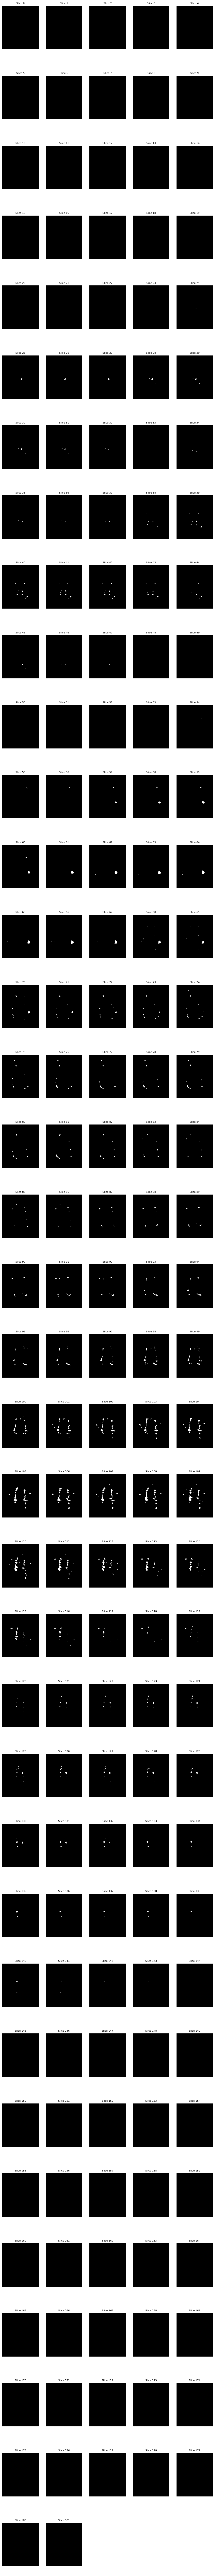

Folder: /train, Example: 600, Image: flair.nii.gz, Pixels: (182, 218, 182)


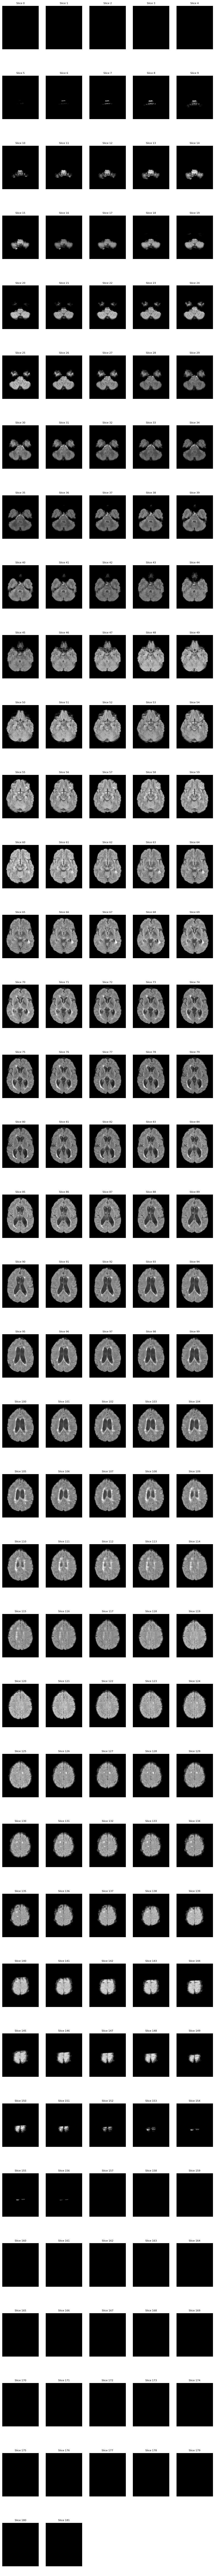

Folder: /train, Example: 600, Image: t1.nii.gz, Pixels: (182, 218, 182)


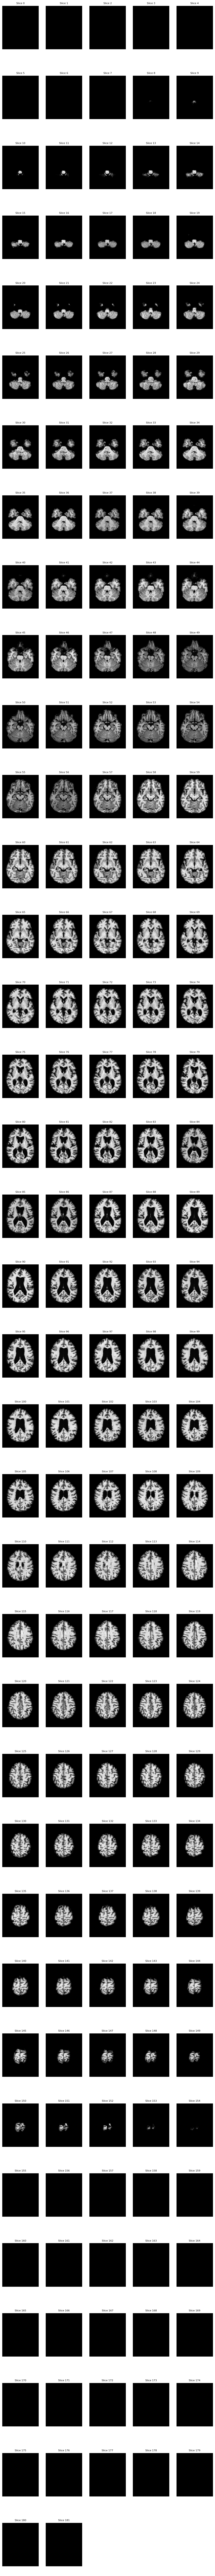

In [3]:
# Path to the data folder
# data_folder = "/data/shared/Lili/VH_MNI"
# folder = "/VH2016"
# Path to the data folder
data_folder = "/home/benet/data/VH"
folders = ["/train", "/test"]  # Both train and test folders

for folder in folders:
    examples = sorted(os.listdir(data_folder + folder))  # Get all example folders
    print
    for example in examples:
        example_path = os.path.join(data_folder+folder, example)
        
        if not os.path.isdir(example_path):  # Skip if it's not a directory
            print(f"Skipping {example_path}")
            continue
        
        # List all .nii.gz files in the example folder
        image_files = [f for f in os.listdir(example_path) if f.endswith('.nii.gz')]
        
        if not image_files:  # Skip if there are no images
            print(f"No images found in {example_path}")
            continue
        
        for image in image_files:
            img_path = os.path.join(example_path, image)
            img = nib.load(img_path)
            data = img.get_fdata()
            print(f"Folder: {folder}, Example: {example}, Image: {image}, Pixels: {data.shape}")
            
            # Determine the number of slices
            n_slices = data.shape[2]
            cols = 5  # Number of images per row
            rows = (n_slices // cols) + (n_slices % cols > 0)
            
            # Create a figure with subplots
            fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
            axes = axes.flatten()
            
            for idx in range(n_slices):
                rotated_slice = np.rot90(data[:, :, idx])
                
                ax = axes[idx]
                ax.imshow(rotated_slice, cmap='gray')
                ax.set_title(f"Slice {idx}", fontsize=8)
                ax.axis('off')
            
            # Hide unused subplots
            for idx in range(n_slices, len(axes)):
                axes[idx].axis('off')
            
            # Adjust layout and display
            # plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust top spacing for suptitle
            plt.show()
        break
    break
